# Deep Learning for Computer Vision by Jason Brownlee (Machine Learning Mastery)

Author: Vaasudevan Srinivasan <br>
Created on: July 27, 2021

Chapter 9: How to Use Image Data Augmentation in Keras

# Normal RGB Image

In [ ]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/01/bird.jpg

--2021-07-27 21:18:12--  https://machinelearningmastery.com/wp-content/uploads/2019/01/bird.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 104.26.1.148, 104.26.0.148, 172.67.72.46, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|104.26.1.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25136 (25K) [image/jpeg]
Saving to: ‘bird.jpg’

bird.jpg            100%[===================>]  24.55K  --.-KB/s    in 0.001s  

2021-07-27 21:18:12 (36.1 MB/s) - ‘bird.jpg’ saved [25136/25136]



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np

(399, 640, 3) float32 (1, 399, 640, 3)


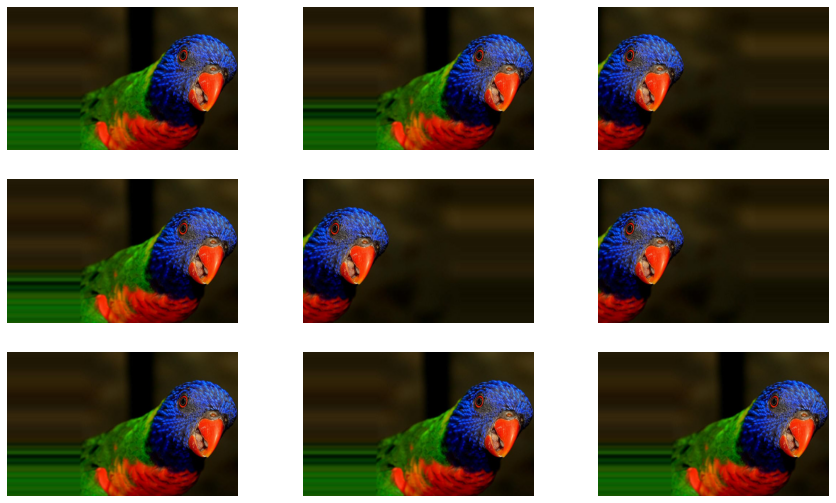

In [ ]:
# Read the image
img = load_img('bird.jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
print(data.shape, data.dtype, samples.shape)

# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200, 200])
it = datagen.flow(samples, batch_size=1)

# Plotting
plt.figure(figsize=(15, 9))
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.axis('off')

# GeoTiff data

In [ ]:
!wget "https://raw.githubusercontent.com/VaasuDevanS/SVM-in-RemoteSensing/master/Implementation/Data/Dataset.tif"

--2021-07-27 21:04:04--  https://raw.githubusercontent.com/VaasuDevanS/SVM-in-RemoteSensing/master/Implementation/Data/Dataset.tif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1003162 (980K) [image/tiff]
Saving to: ‘Dataset.tif’

Dataset.tif         100%[===================>] 979.65K  --.-KB/s    in 0.06s   

2021-07-27 21:04:04 (16.0 MB/s) - ‘Dataset.tif’ saved [1003162/1003162]



In [ ]:
!pip install rasterio

     |████████████████████████████████| 19.3 MB 15.1 MB/s 


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from rasterio.plot import show, reshape_as_image
import rasterio as rio
import numpy as np

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 250, 'height': 250, 'count': 8, 'crs': CRS.from_epsg(32615), 'transform': Affine(30.0, 0.0, 462405.0,
       0.0, -30.0, 1741815.0), 'tiled': False, 'interleave': 'pixel'}
(8, 250, 250)


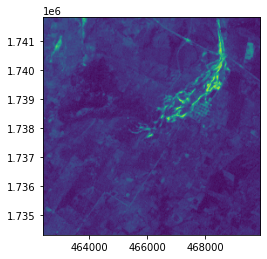

In [ ]:
with rio.open('Dataset.tif') as src:
    data = src.read()
    print(src.profile)
    print(data.shape)
    show(src)

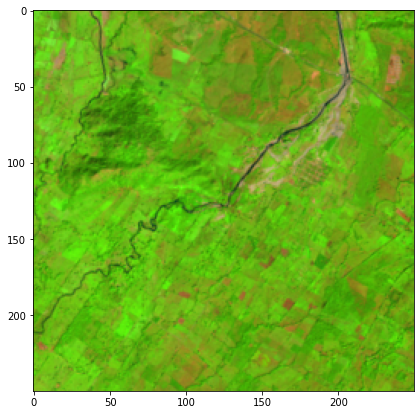

In [ ]:
rgb = reshape_as_image(data[[4, 3, 2]])
norm_data = (rgb - rgb.min()) / (rgb.max() - rgb.min())

plt.figure(figsize=(8, 7))
plt.imshow(norm_data);

(1, 250, 250, 8)


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 250, 250, 8) (8 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


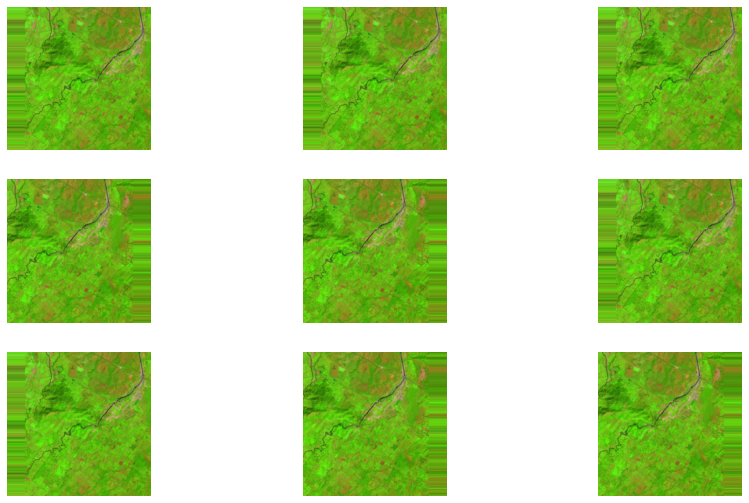

In [ ]:
keras_data = np.expand_dims(reshape_as_image(data), axis=0)
print(keras_data.shape)

# Augmentation
datagen = ImageDataGenerator(width_shift_range=[-30, 30])
it = datagen.flow(keras_data, batch_size=1)

# Plotting
plt.figure(figsize=(15, 9))
for i in range(9):

    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0][:, :, [4, 3, 2]]

    # Normalize and Plot
    norm_data = (image - image.min()) / (image.max() - image.min())
    plt.imshow(norm_data)
    plt.axis('off')